## Machine Learning Model Visual Evaluation Example
This notebook is built to show how to generate these Yellowbrick charts.
The simplicity of their formation allows for quick iteration of model analysis

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import pandas as pd
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, ROCAUC, ClassBalance, ThresholdVisualizer, ClassPredictionError
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Import previously created model see classify.ipynb
# Read in data then split data into training and test sets
# Create Label column defining whether or not the article's upvotes exceed the average vote for the subreddit
# Split data into training and test sets

pipeline = joblib.load('datascience.xz')
data = pd.read_csv('processed_datascience1.csv.bz2')

data['z_scores'] = np.abs((data.ups-data.ups.mean())/data.ups.std())
data = data[data['z_scores']<= 2.5]

## Optional: Log transformation of up-votes
data['log_ups'] = np.log1p(data['ups'])

# Create Label column defining whether or not the article's upvotes exceed the average vote for the subreddit
data['gtavg'] = data.log_ups > data.log_ups.mean()

# Change Target label to Success or Failure
booldict = {True: 'Success', False: 'Failure'}
data['gtavg1'] = data.gtavg.map(booldict)

train_X, test_X, train_y, test_y = train_test_split(data.title, 
                                                    data.gtavg, 
                                                    test_size=0.20,
                                                    random_state=25)

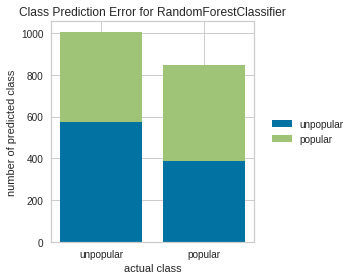

In [14]:
viz = ClassPredictionError(pipeline, classes=['unpopular','popular'])
viz.fit(train_X, train_y)
viz.score(test_X, test_y)
viz.poof()

### Classification Report

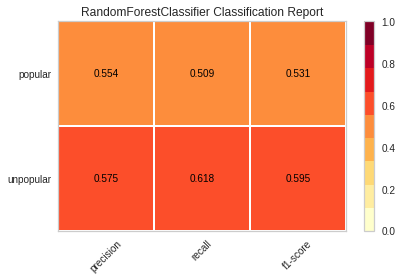

In [15]:
visualizer = ClassificationReport(pipeline, classes=['unpopular', 'popular'])
visualizer.fit(train_X, train_y)
visualizer.score(test_X,test_y)
visualizer.poof()

### Confusion Matrix

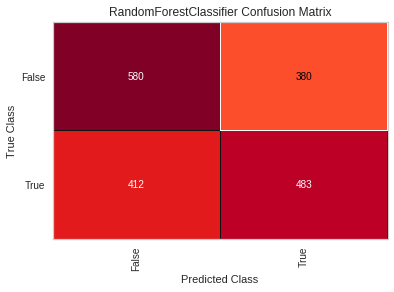

In [19]:
cm = ConfusionMatrix(pipeline)
cm.fit(train_X, train_y)
cm.score(test_X, test_y)
cm.poof()

### ROC AUC

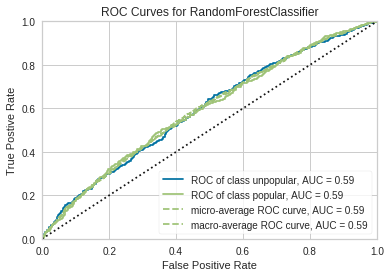

In [17]:
visualizer = ROCAUC(pipeline, classes=['unpopular', 'popular'])
visualizer.fit(train_X, train_y)
visualizer.score(test_X, test_y)
g=visualizer.poof()

### Class Balance

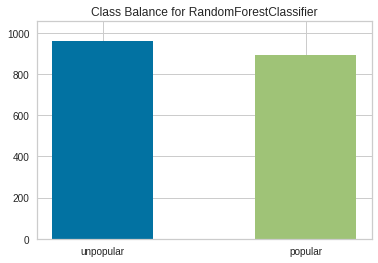

In [16]:
visualizer = ClassBalance(pipeline, classes=['unpopular', 'popular'])
visualizer.fit(train_X, train_y)
visualizer.score(test_X, test_y)
g=visualizer.poof()

### DiscriminationThreshold

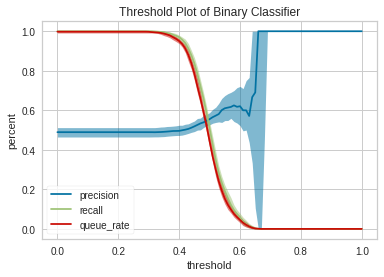

ThresholdVisualizer(model=None, n_trials=50, quantiles=(0.1, 0.5, 0.9),
          random_state=None, test_size_percent=0.1)

In [8]:
visualizer = ThresholdVisualizer(pipeline)
visualizer.fit_poof(data.title, data.gtavg)